In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
import time

In [2]:
Train = pd.read_csv('Dcmd_dataset.csv')

In [3]:
x = Train.iloc[:,:-1].values
y = Train.iloc[:,-1].values

In [4]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [5]:
mse_values = []
for k in range(1, 13):
    scaler = StandardScaler()
    knn = KNeighborsRegressor(n_neighbors=k)
    pipe = make_pipeline(scaler,knn)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
best_k = mse_values.index(min(mse_values)) + 1

In [6]:
scaler = StandardScaler()
knn = KNeighborsRegressor(n_neighbors=best_k)
ensemble = BaggingRegressor(base_estimator=knn)
pipe = make_pipeline(scaler,ensemble)

In [7]:
initial = time.time()
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor',
                 BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=1)))])

In [8]:
print(time.time()-initial)

0.03143310546875


In [9]:
y_pred_test=pipe.predict(X_test)
y_pred_train=pipe.predict(X_train)

In [10]:
print(r2_score(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_percentage_error(y_test,y_pred_test))

0.8947190056515038
0.033299062499999976
0.042988852416912124


In [11]:
print(r2_score(y_train,y_pred_train))
print(mean_squared_error(y_train,y_pred_train))
print(mean_absolute_percentage_error(y_train,y_pred_train))

0.9526516541808071
0.014884437499999978
0.026671601520850158


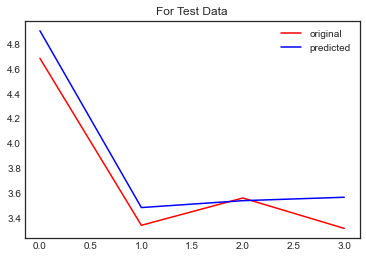

In [12]:
plt.style.use('seaborn-white')
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label='original',c='red')
plt.plot(x_ax,y_pred_test,label='predicted',c='blue')
plt.title("For Test Data")
plt.legend()
plt.show()

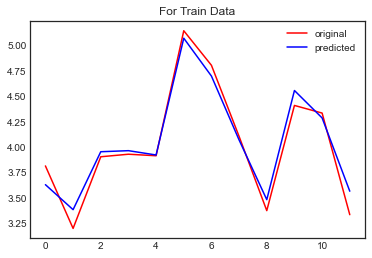

In [13]:
plt.style.use('seaborn-white')
x_ax = range(len(y_train))
plt.plot(x_ax,y_train,label='original',c='red')
plt.plot(x_ax,y_pred_train,label='predicted',c='blue')
plt.title("For Train Data")
plt.legend()
plt.show()

In [14]:
RD = ((y_pred_train-y_train)*100)/y_train
RD1 = ((y_pred_test-y_test)*100)/y_test

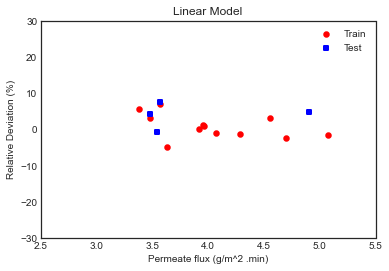

In [15]:
plt.xlim(2.5,5.5)
plt.ylim(-30,30)
plt.scatter(y_pred_train,RD,c="red",marker='o',linewidths=2,s=20,label='Train')
plt.scatter(y_pred_test,RD1,c="blue",marker='s',linewidths=2,s=20,label='Test')
plt.xlabel("Permeate flux (g/m^2 .min)")
plt.ylabel("Relative Deviation (%)")
plt.title("Linear Model")
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

In [16]:
np.set_printoptions(precision=2)
print("Train data comparasion")
print("\n\n\n FT     FF   Con   PT   predicted Actual")
print(np.concatenate((X_train,y_pred_train.reshape(len(y_pred_train),1),y_train.reshape(len(y_train),1)),1))

Train data comparasion



 FT     FF   Con   PT   predicted Actual
[[65.    1.   20.   15.    3.63  3.81]
 [65.    0.8  15.   18.    3.38  3.2 ]
 [70.    0.8  20.   12.    3.95  3.9 ]
 [60.    1.2  20.    9.    3.96  3.93]
 [60.    1.    5.   18.    3.92  3.92]
 [70.    1.4   5.   15.    5.07  5.14]
 [65.    1.4  10.    9.    4.7   4.8 ]
 [60.    1.4  15.   12.    4.07  4.11]
 [55.    0.8   5.    9.    3.48  3.38]
 [70.    1.2  10.   18.    4.56  4.41]
 [70.    1.   15.    9.    4.29  4.33]
 [55.    1.4  20.   18.    3.57  3.33]]


In [17]:
np.set_printoptions(precision=2)
print("Test data comparasion")
print("\n\n\n FT     FF   Con   PT   predicted Actual")
print(np.concatenate((X_test,y_pred_test.reshape(len(y_pred_test),1),y_test.reshape(len(y_test),1)),1))

Test data comparasion



 FT     FF   Con   PT   predicted Actual
[[65.    1.2   5.   12.    4.91  4.68]
 [55.    1.   10.   12.    3.48  3.34]
 [60.    0.8  10.   15.    3.54  3.56]
 [55.    1.2  15.   15.    3.57  3.31]]
